<a href="https://colab.research.google.com/github/RITIK-12/HAR/blob/main/Notebooks/MLinComm_Multi_Modal_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-Frequency RF Sensor Based Human Activity Recognition : MultiModal Deep Learning Approach

In [ ]:
#Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
import keras
from tensorflow.keras import layers, models, Input
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten, Concatenate, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
import pathlib
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy
from sklearn.metrics import confusion_matrix
import itertools

##Dataset Preparation

In [ ]:
data_dir_X = '/content/drive/MyDrive/RFSensorBasedHumanActivityRecognition/Spectograms_77_24_Xethrue/Spectrograms_24GHz/'
data_dir_X = pathlib.Path(data_dir_X)
train_dir_X = '/content/drive/MyDrive/RFSensorBasedHumanActivityRecognition/Spectograms_77_24_Xethrue/Spectrograms_24GHz_split_data/train/'
train_dir = pathlib.Path(train_dir_X)
test_dir_X = '/content/drive/MyDrive/RFSensorBasedHumanActivityRecognition/Spectograms_77_24_Xethrue/Spectrograms_24GHz_split_data/test/'
test_dir = pathlib.Path(test_dir_X)
valid_dir_X = '/content/drive/MyDrive/RFSensorBasedHumanActivityRecognition/Spectograms_77_24_Xethrue/Spectrograms_24GHz_split_data/val/'
valid_dir = pathlib.Path(valid_dir_X)

In [ ]:
batch_size = 16
img_height = 128
img_width = 128

In [ ]:
train_ds_X = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir_X,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical'
  )

Found 1339 files belonging to 11 classes.


In [ ]:
test_ds_X = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir_X,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical',
  )

Found 203 files belonging to 11 classes.


In [ ]:
val_ds_X = tf.keras.preprocessing.image_dataset_from_directory(
  valid_dir_X,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

Found 373 files belonging to 11 classes.


In [ ]:
class_names = test_ds_X.class_names
print(class_names)

['05 walking towards radar', '06 walking away from radar', '07 picking up object', '08 bending', '09 sitting', '10 kneeling', '11 crawling', '16 walking on toes both', '17 limping with right stiff', '18 short steps', '19 scissors gait']


In [ ]:
for image_batch, labels_batch in train_ds_X:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 128, 128, 3)
(16, 11)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds_X = train_ds_X.cache().prefetch(buffer_size=AUTOTUNE)
test_ds_X = test_ds_X.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#Exctracting and Saving Test Images and Labels from Test Dataset
train_images_X = []
train_labels_X = []
for image, label in train_ds_X.take(len(train_ds_X)).unbatch():
  train_images_X.append(image)
  train_labels_X.append(label)

In [ ]:
#Exctracting and Saving Test Images and Labels from Test Dataset
val_images_X = []
val_labels_X = []
for image, label in val_ds_X.take(len(val_ds_X)).unbatch():
  val_images_X.append(image)
  val_labels_X.append(label)

In [ ]:
#Exctracting and Saving Test Images and Labels from Test Dataset
test_images_X = []
test_labels_X = []
for image, label in test_ds_X.take(len(test_ds_X)).unbatch():
  test_images_X.append(image)
  test_labels_X.append(label)

In [ ]:
train_dir_Y = '/content/drive/MyDrive/RFSensorBasedHumanActivityRecognition/Spectograms_77_24_Xethrue/activity_spectogram_77GHz_split_data/train/'
train_dir_Y = pathlib.Path(train_dir_Y)
test_dir_Y = '/content/drive/MyDrive/RFSensorBasedHumanActivityRecognition/Spectograms_77_24_Xethrue/activity_spectogram_77GHz_split_data/test/'
test_dir_Y = pathlib.Path(test_dir_Y)
valid_dir_Y = '/content/drive/MyDrive/RFSensorBasedHumanActivityRecognition/Spectograms_77_24_Xethrue/activity_spectogram_77GHz_split_data/val/'
valid_dir_Y = pathlib.Path(valid_dir_Y)

In [ ]:
batch_size = 16
img_height = 128
img_width = 128

In [ ]:
train_ds_Y = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir_X,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical'
  )

Found 1339 files belonging to 11 classes.


In [ ]:
val_ds_Y = tf.keras.preprocessing.image_dataset_from_directory(
  valid_dir_X,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

Found 373 files belonging to 11 classes.


In [ ]:
test_ds_Y = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir_X,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical',
  )

Found 203 files belonging to 11 classes.


In [ ]:
class_names = test_ds_Y.class_names
print(class_names)

['05 walking towards radar', '06 walking away from radar', '07 picking up object', '08 bending', '09 sitting', '10 kneeling', '11 crawling', '16 walking on toes both', '17 limping with right stiff', '18 short steps', '19 scissors gait']


In [ ]:
for image_batch, labels_batch in train_ds_Y:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 128, 128, 3)
(16, 11)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds_Y = train_ds_Y.cache().prefetch(buffer_size=AUTOTUNE)
val_ds_Y = val_ds_Y.cache().prefetch(buffer_size=AUTOTUNE)
test_ds_Y = test_ds_Y.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#Exctracting and Saving Test Images and Labels from Test Dataset
train_images_Y = []
train_labels_Y = []
for image, label in train_ds_Y.take(len(train_ds_Y)).unbatch():
  train_images_Y.append(image)
  train_labels_Y.append(label)

In [ ]:
#Exctracting and Saving Test Images and Labels from Test Dataset
val_images_Y = []
val_labels_Y = []
for image, label in val_ds_Y.take(len(val_ds_Y)).unbatch():
  val_images_Y.append(image)
  val_labels_Y.append(label)

In [ ]:
#Exctracting and Saving Test Images and Labels from Test Dataset
test_images_Y = []
test_labels_Y = []
for image, label in test_ds_Y.take(len(test_ds_Y)).unbatch():
  test_images_Y.append(image)
  test_labels_Y.append(label)

In [ ]:
train_dir_Z = '/content/drive/MyDrive/RFSensorBasedHumanActivityRecognition/Spectograms_77_24_Xethrue/spectogram_Xethru_split_data/train/'
train_dir_Z = pathlib.Path(train_dir_X)
test_dir_Z = '/content/drive/MyDrive/RFSensorBasedHumanActivityRecognition/Spectograms_77_24_Xethrue/spectogram_Xethru_split_data/test/'
test_dir_Z = pathlib.Path(test_dir_X)
valid_dir_Z = '/content/drive/MyDrive/RFSensorBasedHumanActivityRecognition/Spectograms_77_24_Xethrue/spectogram_Xethru_split_data/val/'
valid_dir_Z = pathlib.Path(valid_dir_X)

In [ ]:
batch_size = 16
img_height = 128
img_width = 128

In [ ]:
train_ds_Z = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir_Z,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical'
  )

Found 1339 files belonging to 11 classes.


In [ ]:
val_ds_Z = tf.keras.preprocessing.image_dataset_from_directory(
  valid_dir_Z,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

Found 373 files belonging to 11 classes.


In [ ]:
test_ds_Z = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir_Z,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical',
  )

Found 203 files belonging to 11 classes.


In [ ]:
class_names = test_ds_Z.class_names
print(class_names)

['05 walking towards radar', '06 walking away from radar', '07 picking up object', '08 bending', '09 sitting', '10 kneeling', '11 crawling', '16 walking on toes both', '17 limping with right stiff', '18 short steps', '19 scissors gait']


In [ ]:
for image_batch, labels_batch in train_ds_Z:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 128, 128, 3)
(16, 11)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds_Z = train_ds_Z.cache().prefetch(buffer_size=AUTOTUNE)
vals_ds_Z = val_ds_Z.cache().prefetch(buffer_size=AUTOTUNE)
test_ds_Z = test_ds_Z.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#Exctracting and Saving Test Images and Labels from Test Dataset
train_images_Z = []
train_labels_Z = []
for image, label in train_ds_Z.take(len(train_ds_Z)).unbatch():
  train_images_Z.append(image)
  train_labels_Z.append(label)

In [ ]:
#Exctracting and Saving Test Images and Labels from Test Dataset
val_images_Z = []
val_labels_Z = []
for image, label in val_ds_Z.take(len(val_ds_Z)).unbatch():
  val_images_Z.append(image)
  val_labels_Z.append(label)

In [ ]:
#Exctracting and Saving Test Images and Labels from Test Dataset
test_images_Z = []
test_labels_Z = []
for image, label in test_ds_Z.take(len(test_ds_Z)).unbatch():
  test_images_Z.append(image)
  test_labels_Z.append(label)

##Model Architecture

In [ ]:
#Define three sets of inputs
inputA = Input(shape=(224, 224, 3), name="24_GHz")
inputB = Input(shape=(224, 224, 3), name="77_GHz")
inputC = Input(shape=(224, 224, 3), name="Xethru")

# the first branch operates on the first input
x = Conv2D(32, (10, 10), activation='relu', input_shape=(224, 224, 3))(inputA)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (7, 7), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Conv2D(96, (5, 5), activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (5, 5), activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = Model(inputs=inputA, outputs=x)

# the second branch opreates on the second input
y = Conv2D(32, (10, 10), activation='relu', input_shape=(224, 224, 3))(inputB)
y = BatchNormalization()(y)
y = MaxPooling2D()(y)
y = Conv2D(64, (7, 7), activation='relu')(y)
y = BatchNormalization()(y)
y = MaxPooling2D()(y)
y = Conv2D(96, (5, 5), activation='relu')(y)
y = BatchNormalization()(y)
y = Conv2D(128, (5, 5), activation='relu')(y)
y = BatchNormalization()(y)
y = Conv2D(256, (3, 3), activation='relu')(y)
y = BatchNormalization()(y)
y = Model(inputs=inputB, outputs=y)

# the third branch opreates on the third input
z = Conv2D(32, (10, 10), activation='relu', input_shape=(224, 224, 3))(inputC)
z = BatchNormalization()(z)
z = MaxPooling2D()(z)
z = Conv2D(64, (7, 7), activation='relu')(z)
z = BatchNormalization()(z)
z = MaxPooling2D()(z)
z = Conv2D(96, (5, 5), activation='relu')(z)
z = BatchNormalization()(z)
z = Conv2D(128, (5, 5), activation='relu')(z)
z = BatchNormalization()(z)
z = Conv2D(256, (3, 3), activation='relu')(z)
z = BatchNormalization()(z)
z = Model(inputs=inputC, outputs=z)

# combine the output of the three branches
combined = Concatenate()([x.output, y.output, z.output])
d = GlobalMaxPooling2D()(combined)
d = Dense(1024, activation='relu')(d)
d = Dropout(0.25)(d)
d = Dense(512, activation='relu')(d)
d = Dropout(0.25)(d)
d = Dense(11, activation='softmax')(d)

model = Model(inputs=[x.input, y.input, z.input], outputs=d)

In [ ]:
filepath = "model.h5"

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_save = tf.keras.callbacks.ModelCheckpoint(
    filepath, 
    monitor="val_accuracy", 
    verbose=0, save_best_only=True, 
    save_weights_only=False, 
    mode="max", 
    save_freq="epoch"
    )

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,
                                              restore_best_weights=False
                                              )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                   factor=0.2,
                                   patience=4,
                                   verbose=1,
                                   min_delta=1e-3,min_lr = 5*1e-12,
                                   )

callbacks = [model_save,  reduce_lr]#, early_stop,]

In [ ]:
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics='accuracy')

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 24_GHz (InputLayer)            [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 77_GHz (InputLayer)            [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Xethru (InputLayer)            [(None, 224, 224, 3  0           []                               
                                )]                                                          

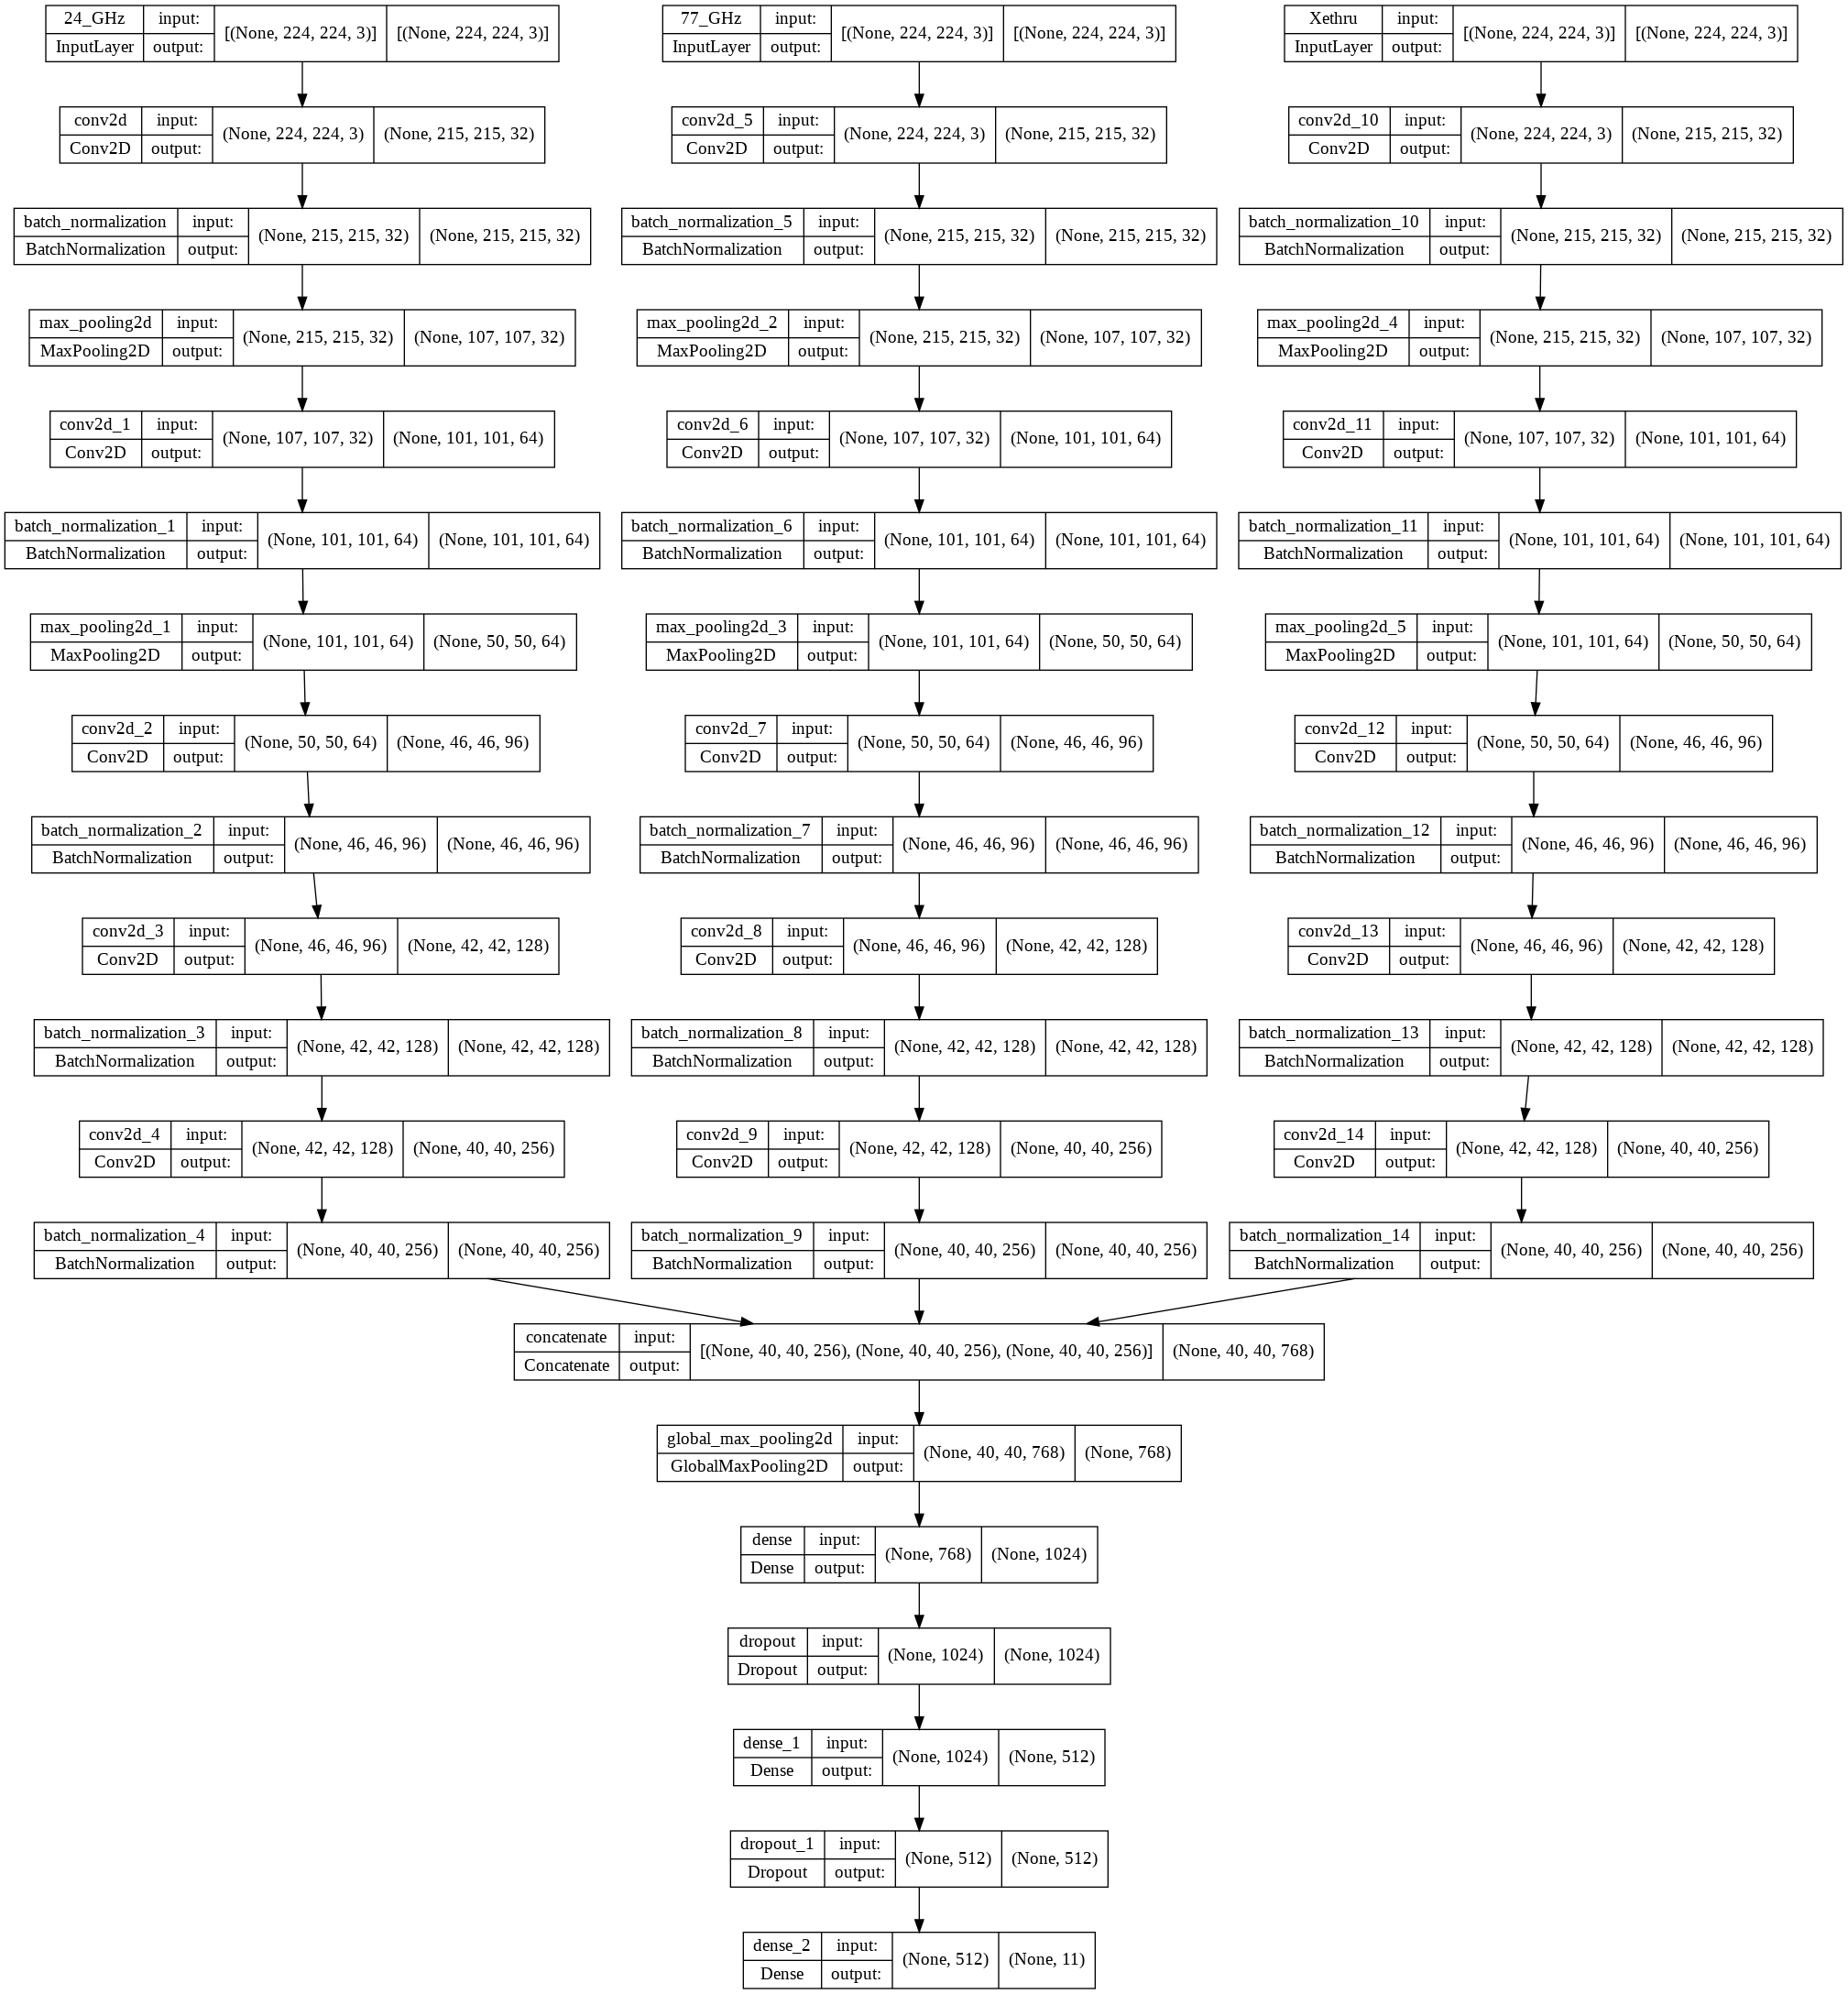

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

##Model Training

In [ ]:
model.fit(
    {"24_Ghz": [train_images_X, train_labels_X], "77_GHz": [train_images_Y, train_labels_Y], "Xethru": [train_images_Z, train_labels_Z]}, validation_data = {"24_Ghz": [val_images_X, val_labels_X], "77_GHz": [val_images_Y, val_labels_Y], "Xethru": [val_images_Z, val_labels_Z]},
    epochs=20,
    batch_size=32,
    callbacks= callbacks,
    use_multiprocessing= True
)

Epoch 1/20
124/124 [==============================] - 29s 182ms/step - loss: 2.1368 - accuracy: 0.4335 - val_loss: 1.3303 - val_accuracy: 0.4413
Epoch 2/20
124/124 [==============================] - 14s 112ms/step - loss: 1.0665 - accuracy: 0.6157 - val_loss: 0.7755 - val_accuracy: 0.7045
Epoch 3/20
124/124 [==============================] - 14s 113ms/step - loss: 0.7607 - accuracy: 0.7186 - val_loss: 0.6550 - val_accuracy: 0.7544
Epoch 4/20
124/124 [==============================] - 14s 113ms/step - loss: 0.6381 - accuracy: 0.7520 - val_loss: 0.5430 - val_accuracy: 0.7949
Epoch 5/20
124/124 [==============================] - 14s 113ms/step - loss: 0.4846 - accuracy: 0.8057 - val_loss: 0.4426 - val_accuracy: 0.8205
Epoch 6/20
124/124 [==============================] - 14s 112ms/step - loss: 0.3961 - accuracy: 0.8451 - val_loss: 0.4174 - val_accuracy: 0.8340
Epoch 7/20
124/124 [==============================] - 14s 113ms/step - loss: 0.3410 - accuracy: 0.8650 - val_loss: 0.4178 - val_ac

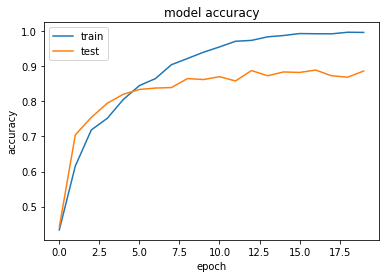

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

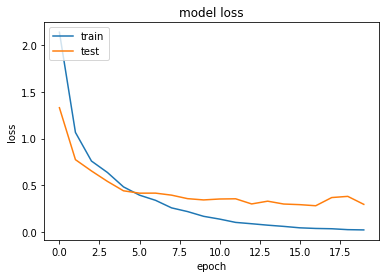

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Model Evaluation

In [ ]:
#Prediction Function
array = model.predict(test_ds, batch_size=1, verbose=1)
y_pred = np.argmax(array, axis=1)

14/14 [==============================] - 36s 876ms/step


In [ ]:
y_true = y = np.concatenate([y for x, y in test_ds], axis=0)

rounded_labels=np.argmax(y_true, axis=1)
rounded_labels[1]

In [ ]:
conf_mat = confusion_matrix(rounded_labels, y_pred)
classes = class_names

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

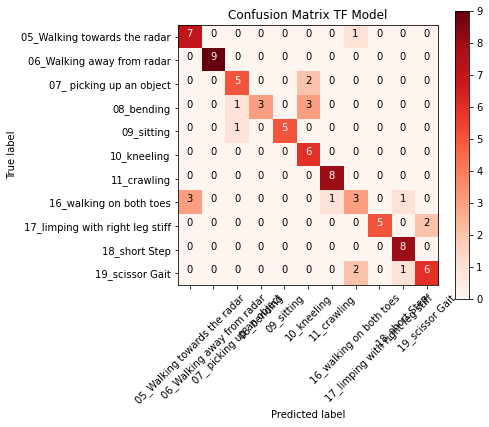

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion Matrix TF Model')
fig1.savefig('cm_wo_norm.png')
plt.show()

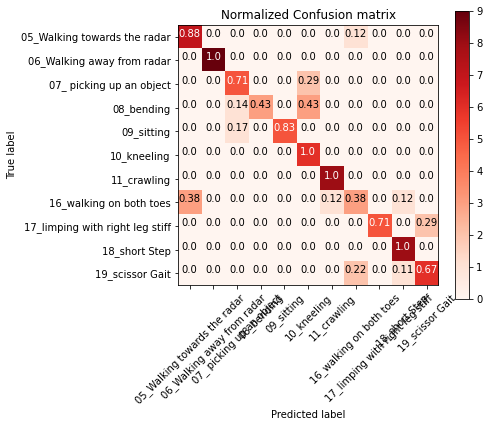

In [ ]:
np.set_printoptions(precision=2)

fig2 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, normalize = True, title='Normalized Confusion matrix')
fig2.savefig('cm_norm.jpg')
plt.show()